# Bogacz & Lebedev coupling parameterization
This notebook will (eventually) help to visualize the coupling parameterization of [Bogacz and Lebedev](https://iopscience.iop.org/article/10.1088/1748-0221/5/10/P10010).

In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'

sys.path.append('/Users/46h/Research/code/accphys')
from tools import (
    plotting as myplt, 
    envelope_analysis as ea,
    coupling as BL)
from tools.envelope_analysis import intrinsic_emittances
from tools.utils import show

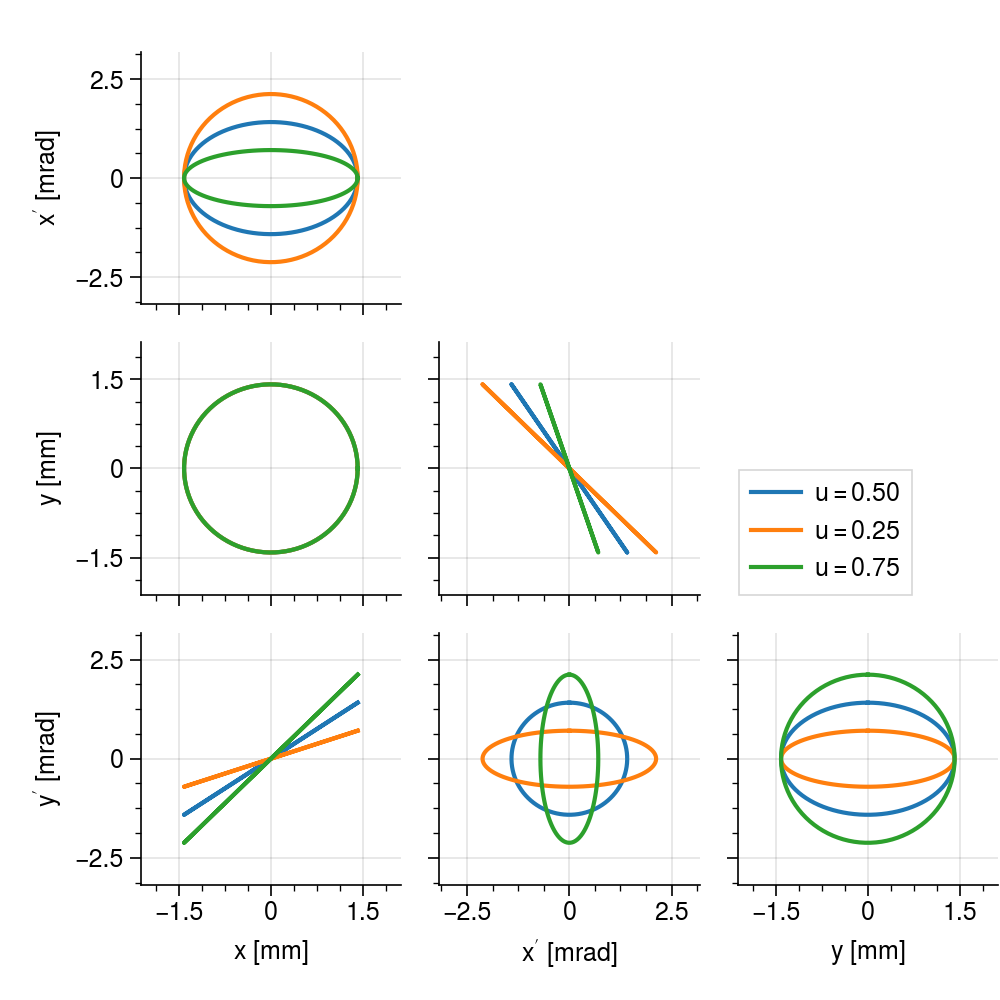

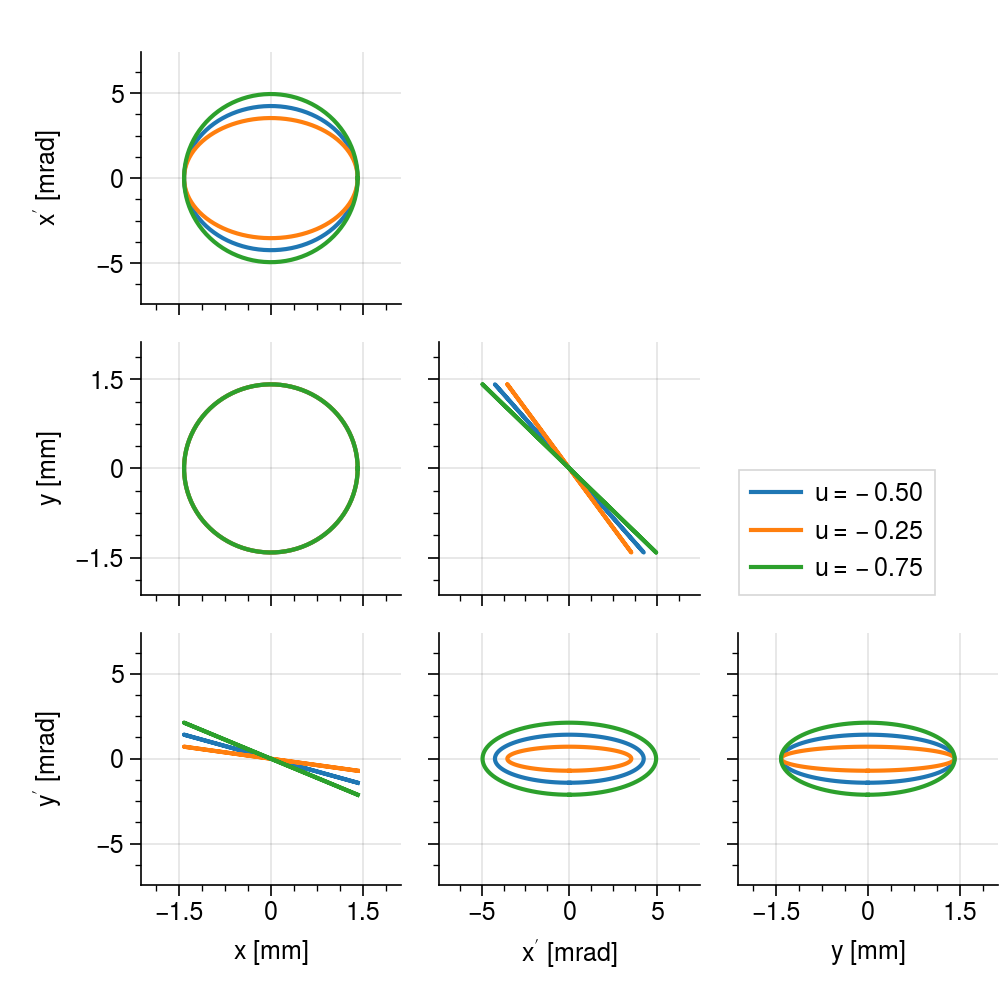

In [2]:
env = ea.Envelope()

def show_diff_u(uvals):
    """Show the effect of changeing the `u` parameter."""
    params_list = []
    for u in uvals:
        env.set_twiss_param_4D('u', u)
        params_list.append(env.params)

    labels = [r'$u = {:.2f}$'.format(u) for u in uvals]
    axes = myplt.corner_env(
        params_list, 
        legend_kws=dict(labels=labels, loc=(1.15, 0)))
    return axes

show_diff_u([0.5, 0.25, 0.75]);
show_diff_u([-0.5, -0.25, -0.75]);

In [3]:
env = ea.Envelope()
env.set_twiss_param_4D('u', -0.5)
print('intrinsic emittances:', intrinsic_emittances(env.cov()))
print('apparent emittances:', env.emittances())

intrinsic emittances: (2.3422606990220297e-16, 0.9999999999999997)
apparent emittances: [1.5 0.5]


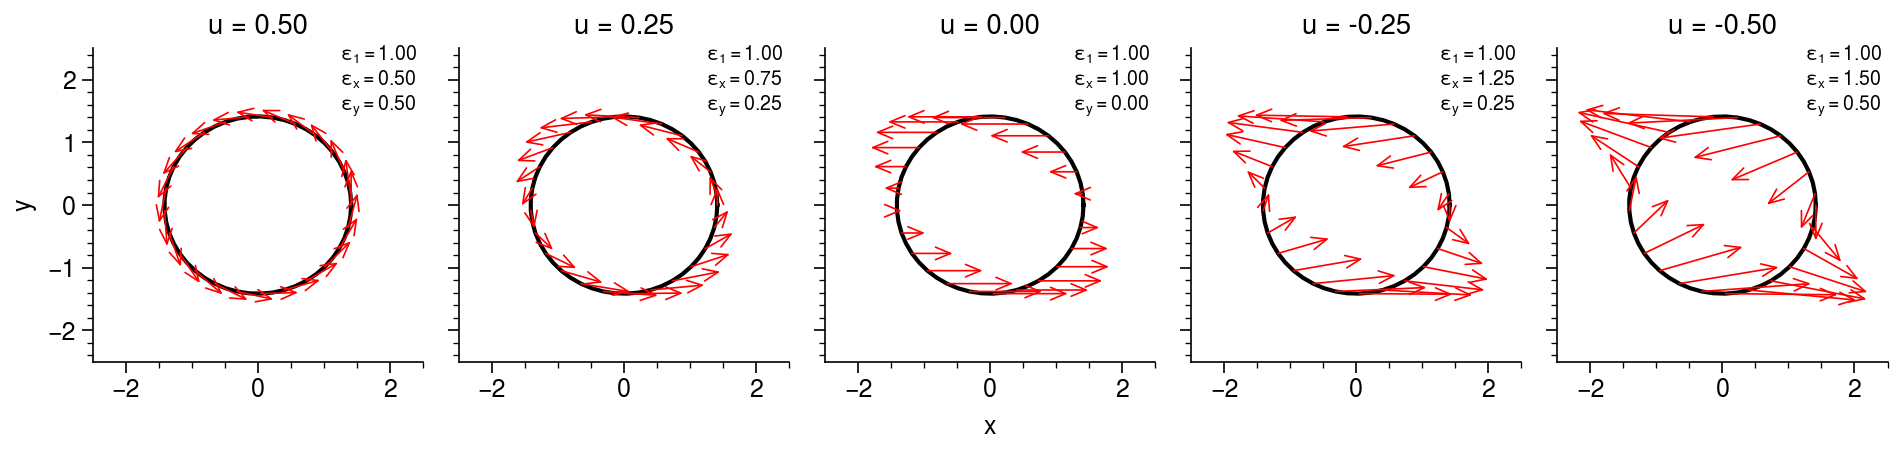

In [4]:
uvals = [0.5, 0.25, 0, -0.25, -0.5]

fig, axes = plot.subplots(ncols=len(uvals), figsize=(9.5, 2.25))

for u, ax in zip(uvals, axes):
    env = ea.Envelope()
    env.set_twiss_param_4D('u', u)
    coords = env.generate_dist(50, 'on_ellipse')
    ax.plot(coords[:, 0], coords[:, 2], 'k-')
    for (x, xp, y, yp) in coords[::2]:
        xp, yp = 0.4 * np.array([xp, yp])
        myplt.vector(ax, [xp, yp], origin=[x, y], c='r', head_width=0.25, head_length=0.6)
    ex, ey = env.emittances()
    e2, e1 = intrinsic_emittances(env.cov())
    ax.annotate(r'$\varepsilon_1 = {:.2f}$'.format(e1), xy=(0.75, 0.96), xycoords='axes fraction', fontsize=7)
    ax.annotate(r'$\varepsilon_x = {:.2f}$'.format(ex), xy=(0.75, 0.88), xycoords='axes fraction', fontsize=7)
    ax.annotate(r'$\varepsilon_y = {:.2f}$'.format(ey), xy=(0.75, 0.8), xycoords='axes fraction', fontsize=7)
    
xmax = 2.5
axes.format(grid=False, xlim=(-xmax, xmax), ylim=(-xmax, xmax), xlabel='x', ylabel='y')
myplt.despine(axes)
myplt.set_labels(axes, ['u = {:.2f}'.format(u) for u in uvals], 'title')

plt.savefig('negative_u.png', dpi=500, facecolor='white')

In [17]:
ax = 0
ay = 0
bx = 0.5
by = 0.5
u = -0.25
nu = np.pi/2
eps = 1.
mode = 1

Sigma = BL.Sigma(ax, ay, bx, by, u, nu, eps, mode)
show(Sigma)

ex = np.sqrt(np.linalg.det(Sigma[:2, :2]))
ey = np.sqrt(np.linalg.det(Sigma[2:, 2:]))
print('ex, ey = {:.2f}, {:.2f}'.format(ex, ey))

⎡ 0.5    0.0    0.0   -0.25⎤
⎢                          ⎥
⎢ 0.0   3.125  -1.25   0.0 ⎥
⎢                          ⎥
⎢ 0.0   -1.25   0.5    0.0 ⎥
⎢                          ⎥
⎣-0.25   0.0    0.0   0.125⎦
ex, ey = 1.25, 0.25
